**Circuits Data**

Enter Description of the data here --> To Edit

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

circuits = pd.read_csv('circuits.csv',encoding = "utf-8")
print('This is the circuits data')
circuits.head()

This is the circuits data


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [78]:
from tabulate import tabulate

my_columns = ['country'] # inspection of different columns here

# extract unique values for the specified columns
unique_values = {col: circuits[col].unique().tolist() for col in my_columns}

# get the maximum number of unique values to determine the number of columns
max_cols = max(len(v) for v in unique_values.values())

# fill each list of unique values to have the same length
for col, values in unique_values.items():
    unique_values[col].extend([''] * (max_cols - len(values)))

# convert the dictionary to a dataframe
unique_df = pd.DataFrame(unique_values)

# create a table with columns as unique values and rows as original columns
table = tabulate(unique_df, headers='keys', tablefmt='grid')

print(table)

+----+---------------+
|    | country       |
+====+===============+
|  0 | Australia     |
+----+---------------+
|  1 | Malaysia      |
+----+---------------+
|  2 | Bahrain       |
+----+---------------+
|  3 | Spain         |
+----+---------------+
|  4 | Turkey        |
+----+---------------+
|  5 | Monaco        |
+----+---------------+
|  6 | Canada        |
+----+---------------+
|  7 | France        |
+----+---------------+
|  8 | UK            |
+----+---------------+
|  9 | Germany       |
+----+---------------+
| 10 | Hungary       |
+----+---------------+
| 11 | Belgium       |
+----+---------------+
| 12 | Italy         |
+----+---------------+
| 13 | Singapore     |
+----+---------------+
| 14 | Japan         |
+----+---------------+
| 15 | China         |
+----+---------------+
| 16 | Brazil        |
+----+---------------+
| 17 | USA           |
+----+---------------+
| 18 | Austria       |
+----+---------------+
| 19 | UAE           |
+----+---------------+
| 20 | Arge

In [79]:
# from the inspection above, USA and United States are listed as two different 
#unique values, they are the same country though so correcting for this.

circuits['country'].replace('USA', 'United States', inplace=True)

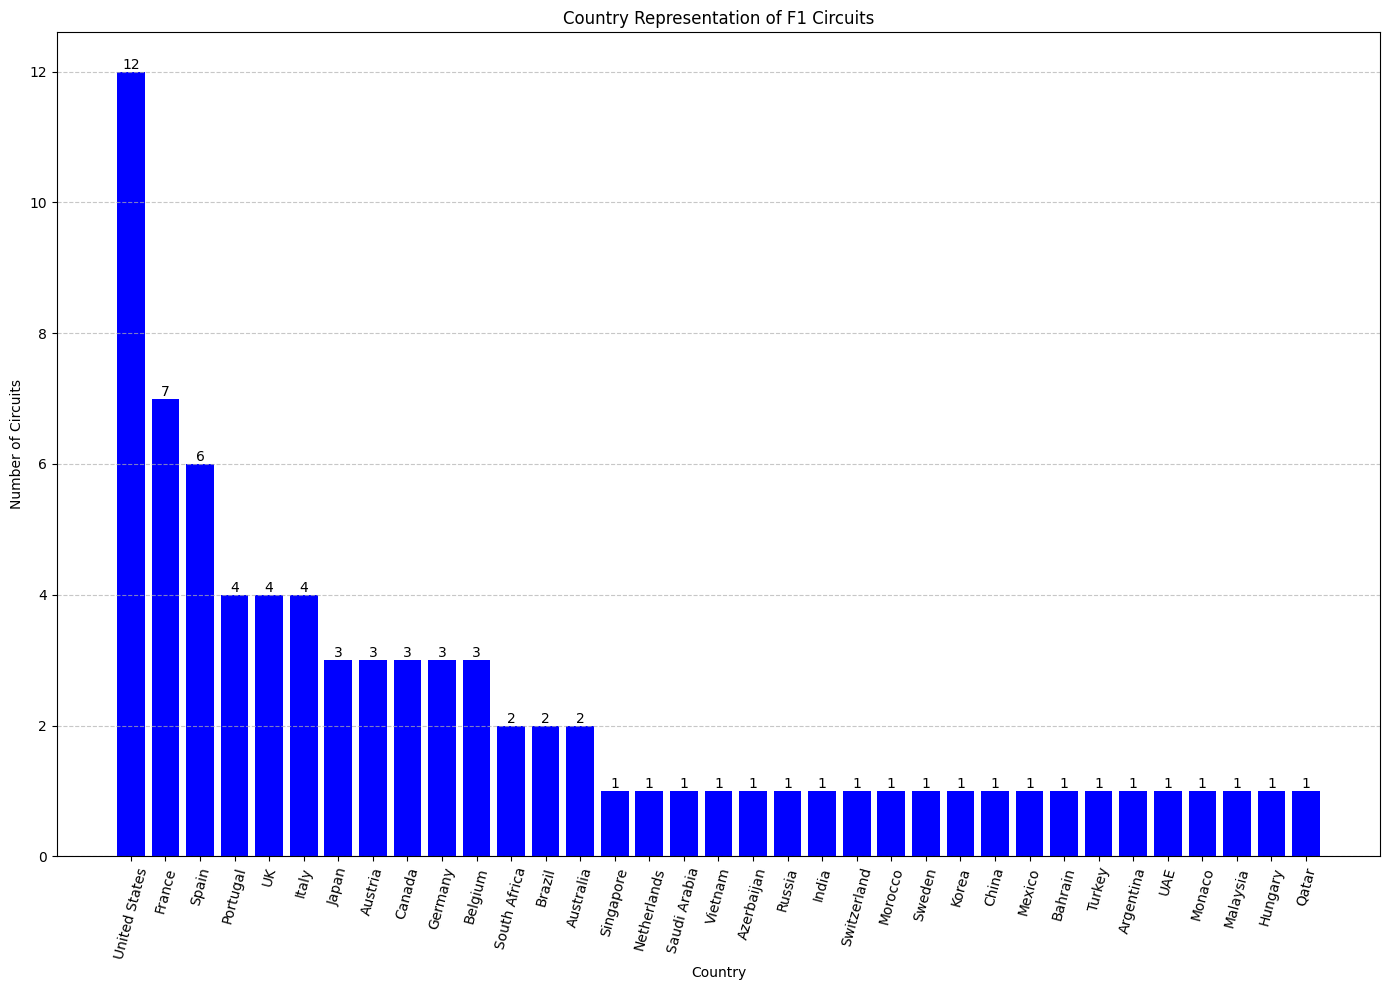

In [80]:
# visualize the country distribution
country_counts = circuits['country'].value_counts()

# Create a bar chart
plt.figure(figsize=(14, 10))  # adjust the size of the bar chart

ax = plt.bar(country_counts.index, country_counts.values, color='blue')

# Add annotation to bars
for barz in ax:
    height = barz.get_height()
    plt.text(barz.get_x() + barz.get_width() / 2., height,
             '%d' % int(height), ha='center', va='bottom', color='black')

plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.title('Country Representation of F1 Circuits')
plt.xticks(rotation=75)  # rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # gridlines for better readability

plt.tight_layout()  # fit labels within the figure boundaries
plt.show()


**Constructors**

In [81]:
constructors = pd.read_csv('constructors.csv',encoding = "utf-8")
print('This is the Constructors data')
constructors.head()

This is the Constructors data


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [82]:
# unique values and data points count
unique_counts = constructors.nunique()
data_points = constructors.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                Unique Values  Total Data Points
constructorId             211                211
constructorRef            211                211
name                      211                211
nationality                24                211
url                       174                211


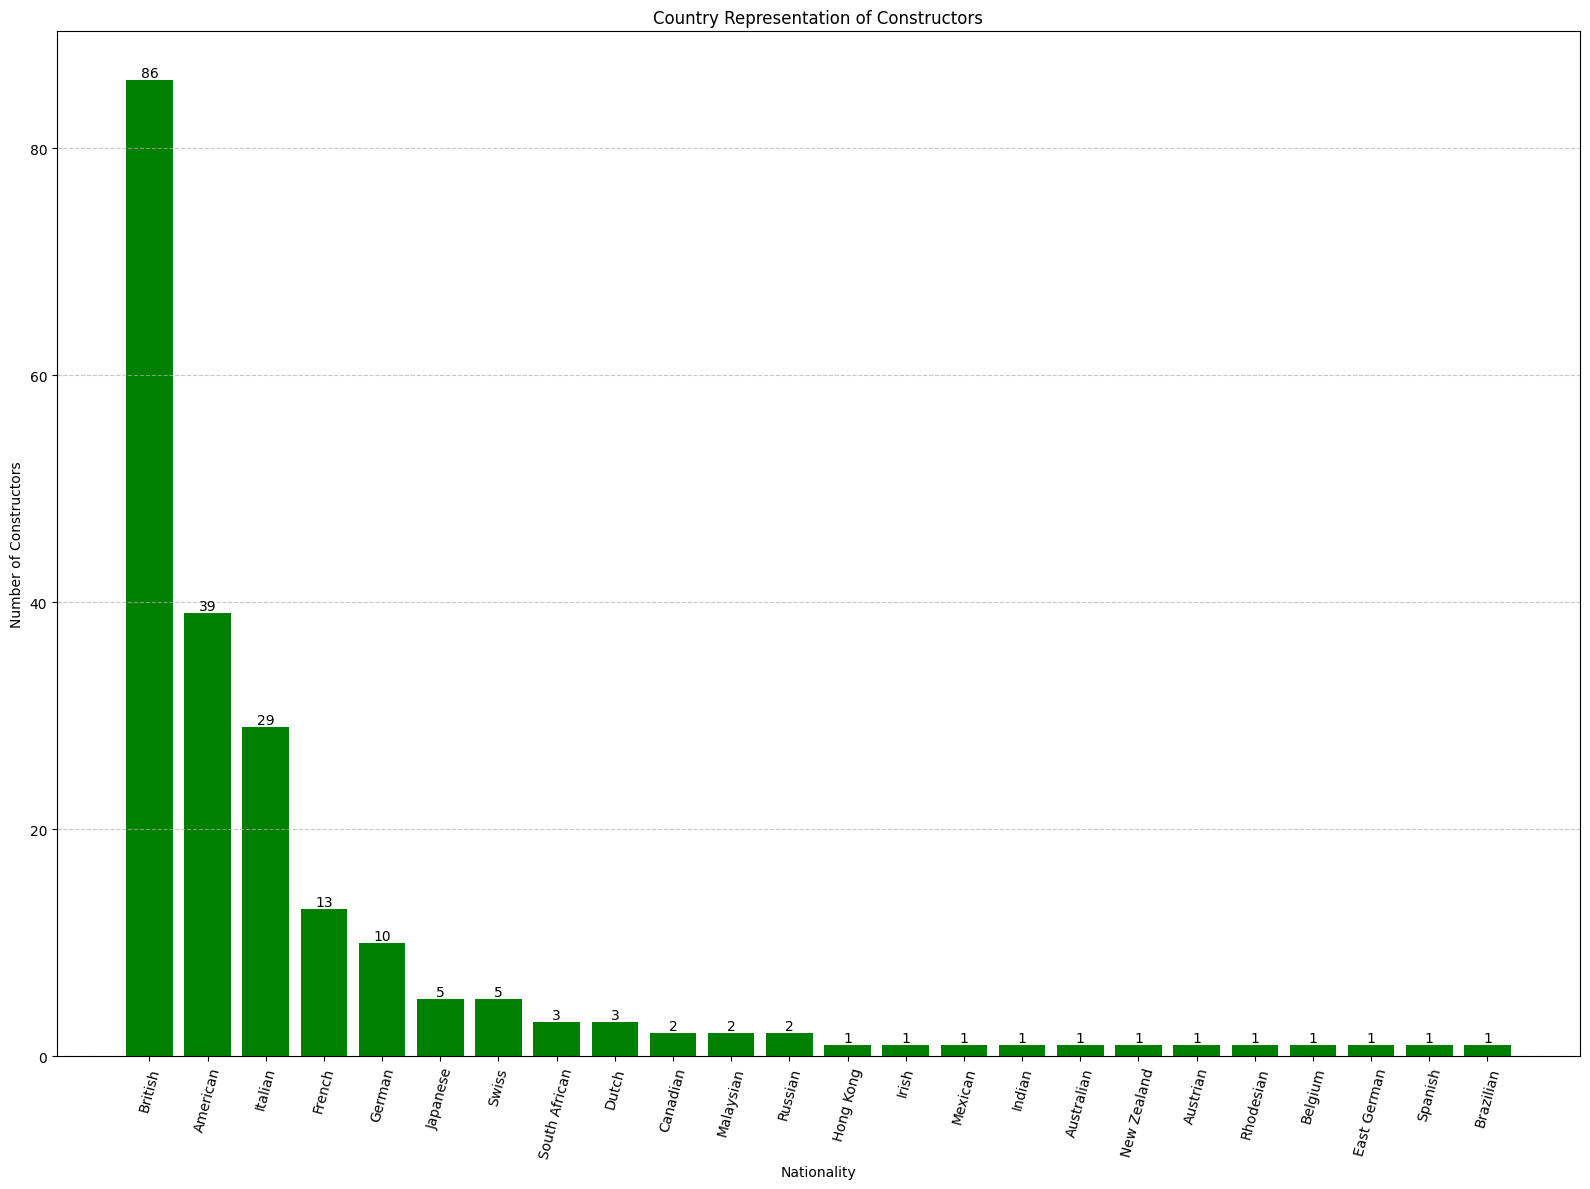

In [83]:
# visualize the nationality distribution
nationality_counts = constructors['nationality'].value_counts()

# Create a bar chart
plt.figure(figsize=(16, 12))  # adjust the size of the bar chart

ax = plt.bar(nationality_counts.index, nationality_counts.values, color='green')

# Add annotation to bars
for barz in ax:
    height = barz.get_height()
    plt.text(barz.get_x() + barz.get_width() / 2., height,
             '%d' % int(height), ha='center', va='bottom', color='black')

plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')
plt.title('Country Representation of Constructors')
plt.xticks(rotation=75)  # rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # gridlines for better readability

plt.tight_layout()  # fit labels within the figure boundaries
plt.show()

**Constructor Results**

Enter Description of the data here --> To Edit

In [84]:
constructor_results = pd.read_csv('constructor_results.csv',encoding = "utf-8")
print('This is the constructor_Results data')
constructor_results.head()

This is the constructor_Results data


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [85]:

# Count the number of unique values for each column
unique_counts = constructor_results.nunique()

# Count the total number of data points (non-missing values) for each column
data_points = constructor_results.count()

# Create a new dataframe to represent the results
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                      Unique Values  Total Data Points
constructorResultsId          11960              11960
raceId                          995              11960
constructorId                   175              11960
points                           53              11960
status                            2              11960


**Constructor Standings**

In [86]:
constructor_standings = pd.read_csv('constructor_standings.csv', encoding = "utf-8")
print('This is the constructor_standings data')
constructor_standings.head()

This is the constructor_standings data


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [87]:
# unique values and data points count
unique_counts = constructor_standings.nunique()
data_points = constructor_standings.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                        Unique Values  Total Data Points
constructorStandingsId          12721              12721
raceId                            994              12721
constructorId                     159              12721
points                            517              12721
position                           22              12721
positionText                       23              12721
wins                               20              12721


**Drivers**

In [88]:
drivers = pd.read_csv('drivers.csv',encoding = "utf-8")
print('This is the Drivers data')
drivers.head()

This is the Drivers data


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [89]:
# unique values and data points count
unique_counts = drivers.nunique()
data_points = drivers.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

             Unique Values  Total Data Points
driverId               854                854
driverRef              854                854
number                  44                854
code                    92                854
forename               474                854
surname                795                854
dob                    836                854
nationality             42                854
url                    854                854


**Driver Standings**

In [90]:
driver_standings = pd.read_csv('driver_standings.csv',encoding = "utf-8")
print('This is the Driver Standings data')
driver_standings.head()

This is the Driver Standings data


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [91]:
# unique values and data points count
unique_counts = driver_standings.nunique()
data_points = driver_standings.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                   Unique Values  Total Data Points
driverStandingsId          33435              33435
raceId                      1058              33435
driverId                     847              33435
points                       402              33435
position                     108              33435
positionText                 109              33435
wins                          14              33435


**Lap Times**

In [92]:
lap_times = pd.read_csv('lap_times.csv',encoding = "utf-8")
print('This is the Lap Times data')
lap_times.head()

This is the Lap Times data


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [93]:
# unique values and data points count
unique_counts = lap_times.nunique()
data_points = lap_times.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

              Unique Values  Total Data Points
raceId                  477             515715
driverId                136             515715
lap                      87             515715
position                 24             515715
time                  73362             515715
milliseconds          73362             515715


**Pitstops Data**

In [94]:
pitstops = pd.read_csv('pit_stops.csv',encoding = "utf-8")
print('This is the Pit Stops data')
lap_times.head()

This is the Pit Stops data


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [95]:
# unique values and data points count
unique_counts = pitstops.nunique()
data_points = pitstops.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

              Unique Values  Total Data Points
raceId                  218               8887
driverId                 69               8887
stop                      6               8887
lap                      74               8887
time                   6792               8887
duration               6336               8887
milliseconds           6336               8887


**Qualifying Data**

In [96]:
quali = pd.read_csv('qualifying.csv',encoding = "utf-8")
print('This is the Qualifying data')
quali.head()

#type(quali['q1'])

This is the Qualifying data


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [97]:
# unique values and data points count
unique_counts = quali.nunique()
data_points = quali.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

               Unique Values  Total Data Points
qualifyId               9155               9155
raceId                   427               9155
driverId                 165               9155
constructorId             46               9155
number                    53               9155
position                  28               9155
q1                      8079               9147
q2                      4589               9021
q3                      2880               8900


**Races** --> Invalid Data, bunch of ?N

In [98]:
races = pd.read_csv('races.csv',encoding = "utf-8")
print('This is the Races data')
races.head()

This is the Races data


,,,,,,,,,,raceId,year,round,circuitId,name,date,time,url
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Grand_Prix,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [99]:
# unique values and data points count
unique_counts = races.nunique()
data_points = races.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

           Unique Values  Total Data Points
raceId                45               1079
year                  12               1079
round                 39               1079
circuitId              9               1079
name                  45               1079
date                  10               1079
time                   7               1079
url                    3               1079


**Results Data**

In [100]:
results = pd.read_csv('results.csv',encoding = "utf-8")
print('This is the Results data')
results.head()

This is the Results data


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [101]:
# unique values and data points count
unique_counts = results.nunique()
data_points = results.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                 Unique Values  Total Data Points
resultId                 25420              25420
raceId                    1058              25420
driverId                   854              25420
constructorId              210              25420
number                     130              25420
grid                        35              25420
position                    34              25420
positionText                39              25420
positionOrder               39              25420
points                      39              25420
laps                       172              25420
time                      6587              25420
milliseconds              6789              25420
fastestLap                  80              25420
rank                        26              25420
fastestLapTime            6429              25420
fastestLapSpeed           6573              25420
statusId                   135              25420


**Seasons**

In [102]:
seasons = pd.read_csv('seasons.csv',encoding = "utf-8")
print('This is the Seasons data')
seasons.head()

This is the Seasons data


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [103]:
# unique values and data points count
unique_counts = seasons.nunique()
data_points = seasons.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

max(seasons['year'])

      Unique Values  Total Data Points
year             73                 73
url              73                 73


2022

**Sprint Results**

In [104]:
sprint = pd.read_csv('sprint_results.csv',encoding = "utf-8")
print('This is the Sprint Results data')
sprint.head()

This is the Sprint Results data


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [105]:
# unique values and data points count
unique_counts = sprint.nunique()
data_points = sprint.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                Unique Values  Total Data Points
resultId                   60                 60
raceId                      3                 60
driverId                   21                 60
constructorId              10                 60
number                     21                 60
grid                       20                 60
position                   21                 60
positionText               21                 60
positionOrder              20                 60
points                      4                 60
laps                        5                 60
time                       59                 60
milliseconds               59                 60
fastestLap                 17                 60
fastestLapTime             60                 60
statusId                    3                 60


**Status** --> not very useful, can't be combined with any other data set. 
--> Find alternative way to determine if they finished the race or not

In [106]:
status = pd.read_csv('status.csv',encoding = "utf-8")
print('This is the Status data')
status.head()

This is the Status data


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [107]:
# unique values and data points count
unique_counts = status.nunique()
data_points = status.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

          Unique Values  Total Data Points
statusId            137                137
status              137                137
